In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

import plotly.express as px
import plotly.graph_objs as go

## Import Data

In [82]:
df = pd.read_csv("Data/world-happiness-report-2021.csv")
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

,missing_value,%
Country name,0,0.0
Regional indicator,0,0.0
Ladder score,0,0.0
Standard error of ladder score,0,0.0
upperwhisker,0,0.0
lowerwhisker,0,0.0
Logged GDP per capita,0,0.0
Social support,0,0.0
Healthy life expectancy,0,0.0
Freedom to make life choices,0,0.0


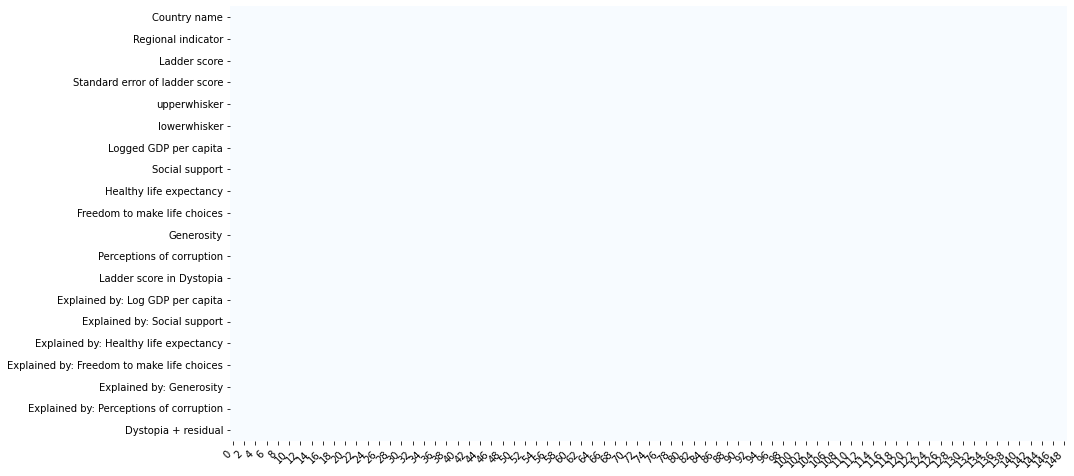

In [26]:
plot_missing_value(df, return_df=True)

In [27]:
df.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,1.490000e+02,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.430000e+00,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,5.347044e-15,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.430000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.430000e+00,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.430000e+00,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.430000e+00,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.430000e+00,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


In [28]:
df.nunique()

Country name                                  149
Regional indicator                             10
Ladder score                                  147
Standard error of ladder score                 65
upperwhisker                                  146
lowerwhisker                                  143
Logged GDP per capita                         148
Social support                                119
Healthy life expectancy                       135
Freedom to make life choices                  126
Generosity                                    130
Perceptions of corruption                     130
Ladder score in Dystopia                        1
Explained by: Log GDP per capita              138
Explained by: Social support                  135
Explained by: Healthy life expectancy         119
Explained by: Freedom to make life choices    130
Explained by: Generosity                      119
Explained by: Perceptions of corruption       117
Dystopia + residual                           142


In [29]:
df.drop(columns='Ladder score in Dystopia', inplace=True)

<AxesSubplot: >

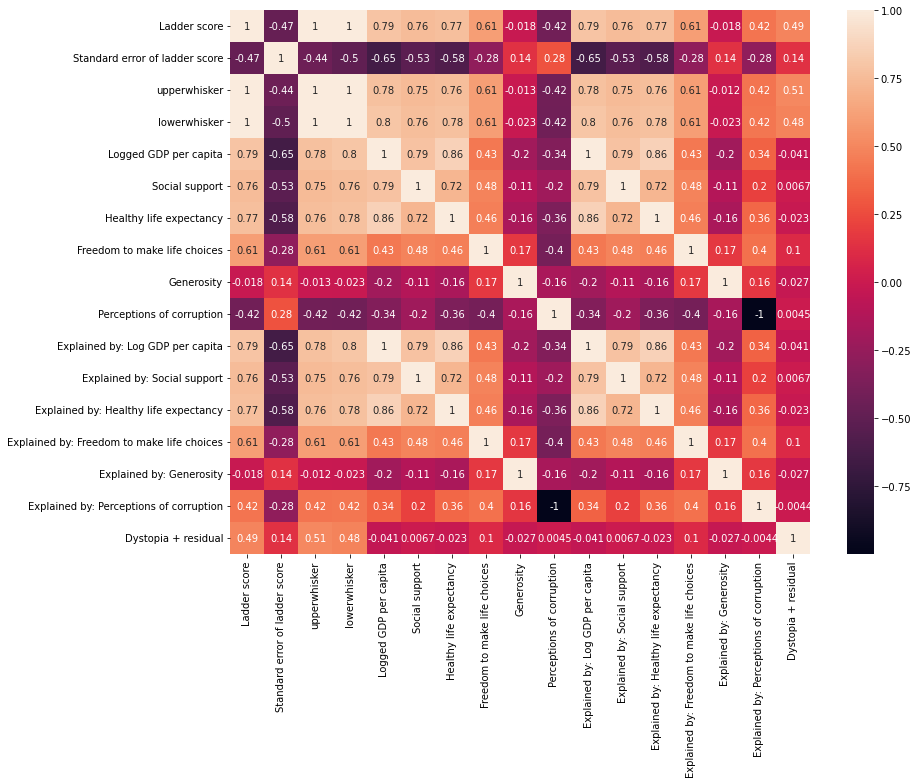

In [30]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(), annot=True)

In [31]:
df.isnull().sum()

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

In [33]:
df.duplicated().sum()

0

###  Alur
1. Thing Simple
2. Feature Importance
3. Poly
4. Tunning
5. EDA


## Data Splitting

In [34]:
X = df.drop(columns="Ladder score")
y = df['Ladder score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((119, 18), (30, 18), (119,), (30,))

## Data Training

In [35]:
X_train.head()

,Country name,Regional indicator,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
22,Malta,Western Europe,0.044,6.688,6.516,10.674,0.931,72.200,0.927,0.133,0.653,1.411,1.055,0.747,0.664,0.275,0.183,2.268
15,Costa Rica,Latin America and Caribbean,0.056,7.179,6.960,9.880,0.891,71.400,0.934,-0.126,0.809,1.134,0.966,0.722,0.673,0.105,0.083,3.387
65,Ecuador,Latin America and Caribbean,0.057,5.875,5.653,9.313,0.821,68.800,0.842,-0.124,0.843,0.935,0.806,0.640,0.560,0.107,0.062,2.653
11,Israel,Middle East and North Africa,0.034,7.224,7.090,10.575,0.939,73.503,0.800,0.031,0.753,1.376,1.074,0.788,0.509,0.208,0.119,3.083
42,Chile,Latin America and Caribbean,0.046,6.262,6.081,10.071,0.882,70.000,0.742,-0.044,0.830,1.200,0.946,0.678,0.438,0.159,0.070,2.682


In [36]:
X_train.columns

Index(['Country name', 'Regional indicator', 'Standard error of ladder score',
       'upperwhisker', 'lowerwhisker', 'Logged GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Explained by: Log GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [37]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

In [38]:
#Paramater
rsp.xgb_params

{'algo__max_depth': Integer(low=1, high=10),
 'algo__learning_rate': Real(low=-2, high=0, prior='log-uniform'),
 'algo__n_estimators': Integer(low=100, high=200),
 'algo__subsample': Real(low=0.3, high=0.8, prior='uniform'),
 'algo__gamma': Integer(low=1, high=10),
 'algo__colsample_bytree': Real(low=0.1, high=1, prior='uniform'),
 'algo__reg_alpha': Real(low=-3, high=1, prior='log-uniform'),
 'algo__reg_lambda': Real(low=-3, high=1, prior='log-uniform')}

In [39]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ["Standard error of ladder score", "upperwhisker", "lowerwhisker", "Logged GDP per capita",
                            "Social support", "Healthy life expectancy", "Freedom to make life choices", "Generosity", 
                             'Perceptions of corruption', 'Explained by: Log GDP per capita', 'Explained by: Social support', 
                             'Explained by: Healthy life expectancy','Explained by: Freedom to make life choices',
                             'Explained by: Generosity', 'Explained by: Perceptions of corruption',
                             'Dystopia + residual']),
    ('categoric', cat_pipe(encoder='onehot'), ["Country name", "Regional indicator",  ]),
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBRegressor(n_jobs=-1, random_state=42))
])

#Tunning
model = RandomizedSearchCV(pipeline, rsp.xgb_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__colsample_bytree': 0.7419203085006956, 'algo__gamma': 1, 'algo__learning_rate': 0.27762530094438326, 'algo__max_depth': 7, 'algo__n_estimators': 113, 'algo__reg_alpha': 0.09444574254983565, 'algo__reg_lambda': 0.12329098365270522, 'algo__subsample': 0.5137705091792748}
0.9781367124391849 0.9544394655127909 0.9893259780992966


## mendapatkan akurasi score 98% selanjutnya kita cari feature importance

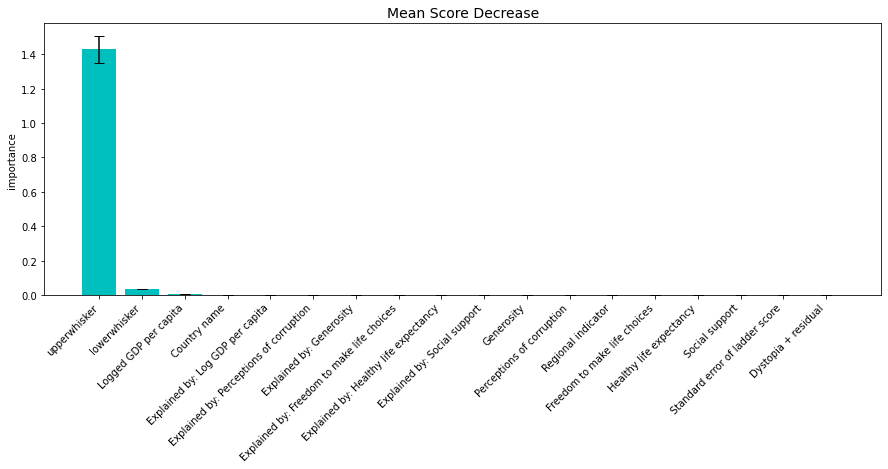

In [41]:
df_imp = mean_score_decrease(X_train, y_train, model, plot=True)

In [42]:
from jcopml.feature_importance import mean_loss_decrease

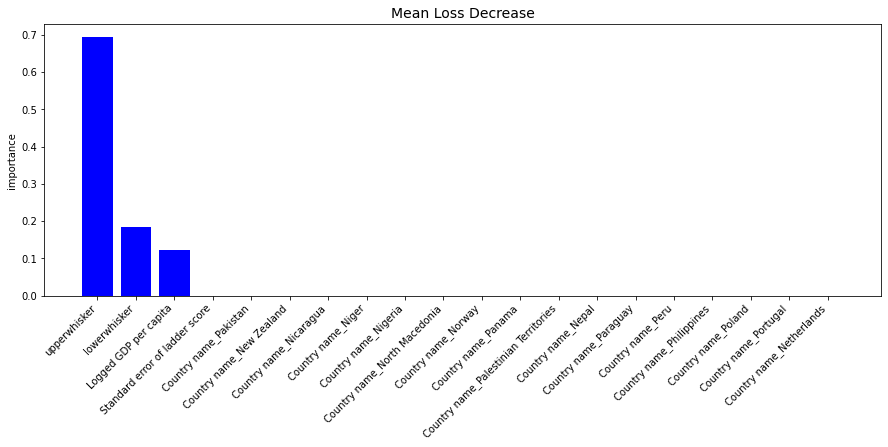

In [46]:
df_imp = mean_loss_decrease(X_train, model, plot=True, topk=20)

### Dari grafik di atas yang mempengaruhi score adalah kolom upperwhisker, lowerwhisker, Logged GDP per capita, selanjutnya kita akan hapus kolom yang tidak mempengaruhi score, untuk mengurangi beban komputasi

In [47]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), [ "upperwhisker", "lowerwhisker", "Logged GDP per capita",]),
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBRegressor(n_jobs=-1, random_state=42))
])

#Tunning
model = RandomizedSearchCV(pipeline, rsp.xgb_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__colsample_bytree': 0.6918516030703091, 'algo__gamma': 1, 'algo__learning_rate': 0.1216411342539395, 'algo__max_depth': 3, 'algo__n_estimators': 185, 'algo__reg_alpha': 0.011502956321912733, 'algo__reg_lambda': 0.009461469059966103, 'algo__subsample': 0.7865052773762229}
0.9823036897711999 0.9587073173857613 0.990226585669033


In [66]:
model.predict(X_test)

array([5.560756 , 6.8988953, 4.7474484, 5.387326 , 5.4677477, 6.3356204,
       5.7353473, 3.8109229, 5.7353473, 5.36216  , 4.926323 , 7.0460086,
       6.234511 , 7.1551433, 6.6421704, 5.926148 , 4.2528505, 5.7353473,
       5.96479  , 4.3497596, 6.3356204, 4.684553 , 6.395501 , 4.4895215,
       4.4119687, 3.8109229, 4.8803816, 5.0951347, 6.1314387, 6.395501 ],
      dtype=float32)

### Dengan mengurangi kolom terlihat score naik menjadi 99%, serta mengurangi beban komputasi dan running menjadi lebih cepat.

### bisa di simpulkan sementara yang mempengaruhi ladder score adalah upperwhisker, lowerwhisker, Logged GDP per capita. selanjutnya kita akan EDA dan Visualisasi

### Save Model

In [56]:
save_model(model.best_estimator_, "xgb_tingkat_harapan_hidup.pkl")

Model is pickled as model/xgb_tingkat_harapan_hidup.pkl


###  EDA & Visualisasi

In [83]:
df.head(5)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [84]:
#sunburst plotly
fig = px.sunburst(df, path=["Regional indicator", "Country name"], 
                  values='Ladder score', 
                  color="Healthy life expectancy",
                 color_continuous_scale="Inferno",
                 )
fig.show()

In [85]:
# Treemaps berdasarkan freedom to make life choices
fig = px.treemap(df, path=["Regional indicator", "Country name"],
                values="Freedom to make life choices")
fig.show()

#### dari grafik diatas sub-saharan african memiliki lebih banyak kebebasan untuk menentukan pilihan hidup, sedangkan negara-negara north america memiliki kebebasan paling sedikit

In [88]:
df['Regional indicator'].value_counts()

Sub-Saharan Africa                    36
Western Europe                        21
Latin America and Caribbean           20
Middle East and North Africa          17
Central and Eastern Europe            17
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             7
East Asia                              6
North America and ANZ                  4
Name: Regional indicator, dtype: int64

In [87]:
df[df['Regional indicator'] == "Southeast Asia"]

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
31,Singapore,Southeast Asia,6.377,0.043,6.460,6.293,11.488,0.915,76.953,0.927,-0.018,0.082,2.43,1.695,1.019,0.897,0.664,0.176,0.547,1.379
53,Thailand,Southeast Asia,5.985,0.047,6.077,5.893,9.805,0.888,67.401,0.884,0.287,0.895,2.43,1.107,0.957,0.596,0.611,0.375,0.028,2.309
60,Philippines,Southeast Asia,5.880,0.052,5.982,5.778,9.076,0.830,62.000,0.917,-0.097,0.742,2.43,0.853,0.828,0.426,0.651,0.125,0.126,2.872
78,Vietnam,Southeast Asia,5.411,0.039,5.488,5.334,8.973,0.850,68.034,0.940,-0.098,0.796,2.43,0.817,0.873,0.616,0.679,0.124,0.091,2.211
80,Malaysia,Southeast Asia,5.384,0.049,5.480,5.289,10.238,0.817,67.102,0.895,0.125,0.839,2.43,1.259,0.797,0.587,0.624,0.270,0.064,1.784
81,Indonesia,Southeast Asia,5.345,0.056,5.454,5.235,9.365,0.811,62.236,0.873,0.542,0.867,2.43,0.954,0.786,0.433,0.598,0.541,0.046,1.987
99,Laos,Southeast Asia,5.030,0.045,5.119,4.941,8.947,0.728,58.968,0.910,0.123,0.658,2.43,0.808,0.598,0.330,0.643,0.268,0.179,2.204
113,Cambodia,Southeast Asia,4.830,0.067,4.963,4.698,8.360,0.765,62.000,0.959,0.034,0.843,2.43,0.603,0.680,0.426,0.702,0.210,0.061,2.148
125,Myanmar,Southeast Asia,4.426,0.052,4.527,4.324,8.541,0.779,59.302,0.876,0.509,0.660,2.43,0.666,0.713,0.341,0.601,0.520,0.178,1.407


In [91]:
#Scatter plot Regional indicator
fig = px.scatter(df, x="Healthy life expectancy", y="Ladder score", 
                color="Regional indicator", 
                color_discrete_sequence = px.colors.sequential.Oranges, 
                template = 'plotly_dark',
                size = 'Social support',
                hover_name="Country name")
fig.show()

### bisa dilihat rata-rata negara sub-sahara africa tingkat harapan hidup paling rendah sedangkan western Europe rata-rata negara  tingkat harapan hidup paling tinggi

In [90]:
#Scatter plot Southeast Asia
df_southeast = df[df['Regional indicator'] == "Southeast Asia"]
fig = px.scatter(df_southeast, x="Healthy life expectancy", y="Ladder score", 
                color="Country name", color_discrete_sequence = px.colors.sequential.Oranges, 
                template = 'plotly_dark',
                size = 'Social support',
                hover_name="Country name")
fig.show()

### tingkat harapan hidup dan ladder score paling tinggi di regional southeast adalah singapura, dan yang paling rendah myanmar, sementara indonesia ada di score tengah dengan tingkat harapan hidup 62.236

In [93]:
fig = px.scatter(df, x="Logged GDP per capita", y="Ladder score", 
                color="Regional indicator", 
                color_discrete_sequence = px.colors.sequential.Oranges, 
                template = 'plotly_dark',
                size = 'Perceptions of corruption',
                hover_name="Country name")
fig.show()

### dengan grafik di atas menjukan GDP yang besar dan tingkat korupsi yang kecil menunjukan score yan gtinggi pula, contoh finlandia dan singapura, sementara GDP paling besar adalah negara luxembourg yaitu 11.647

In [99]:
df_southeast = df[df['Regional indicator'] == "Southeast Asia"]
fig = px.scatter(df_southeast, x="Logged GDP per capita", y="Ladder score", 
                color="Country name", color_discrete_sequence = px.colors.sequential.Oranges, 
                template = 'plotly_dark',
                size = 'Perceptions of corruption',
                hover_name="Country name")
fig.show()

### Sementara di Southeast Asia singapura menjadi negara paling tinggi GDP, indonesia berada di tenggah

In [103]:
fig = px.scatter(df, x="Explained by: Generosity", y="Ladder score", 
                color="Regional indicator", 
                color_discrete_sequence = px.colors.sequential.Oranges, 
                template = 'plotly_dark',
                size = 'Explained by: Generosity',
                hover_name="Country name",
                title="Tingkat kemurahan hati")
fig.show()

### Terbukti indonesia merupakan tingkat kemurahan hati yang paling tinggi dan sangat ramah

In [105]:
fig = px.scatter(df, x="Explained by: Social support", y="Ladder score", 
                color="Regional indicator", 
                color_discrete_sequence = px.colors.sequential.Oranges, 
                template = 'plotly_dark',
                size = 'Explained by: Social support',
                hover_name="Country name",
                title="Tingkat Dukungan Sosial")
fig.show()

In [117]:
fig = px.choropleth(df, 
                    locations = 'Country name',
                    color = 'Ladder score',
                    locationmode="country names",
                    hover_name = 'Country name',
                    color_continuous_scale=px.colors.sequential.Oranges,
                    title='World - Happiness Score'
 )
fig.show()